In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/kaggle/input/ushealthinsurancedataset/insurance.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df['smoker'].value_counts()

smoker
no     1064
yes     274
Name: count, dtype: int64

In [5]:
df['sex'].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [6]:
df['region'].value_counts()

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [7]:
df['sex'] = df['sex'].apply(lambda x : 1 if x == 'male' else 0)
df['smoker'] = df['smoker'].apply(lambda x : 1 if x == 'yes' else 0)

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [9]:
df = df.join(pd.get_dummies(df.region, dtype=int)).drop(columns=['region'],axis=1)

In [10]:
df

,age,sex,bmi,children,smoker,charges,northeast,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,0,1
1,18,1,33.770,1,0,1725.55230,0,0,1,0
2,28,1,33.000,3,0,4449.46200,0,0,1,0
3,33,1,22.705,0,0,21984.47061,0,1,0,0
4,32,1,28.880,0,0,3866.85520,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,10600.54830,0,1,0,0
1334,18,0,31.920,0,0,2205.98080,1,0,0,0
1335,18,0,36.850,0,0,1629.83350,0,0,1,0
1336,21,0,25.800,0,0,2007.94500,0,0,0,1


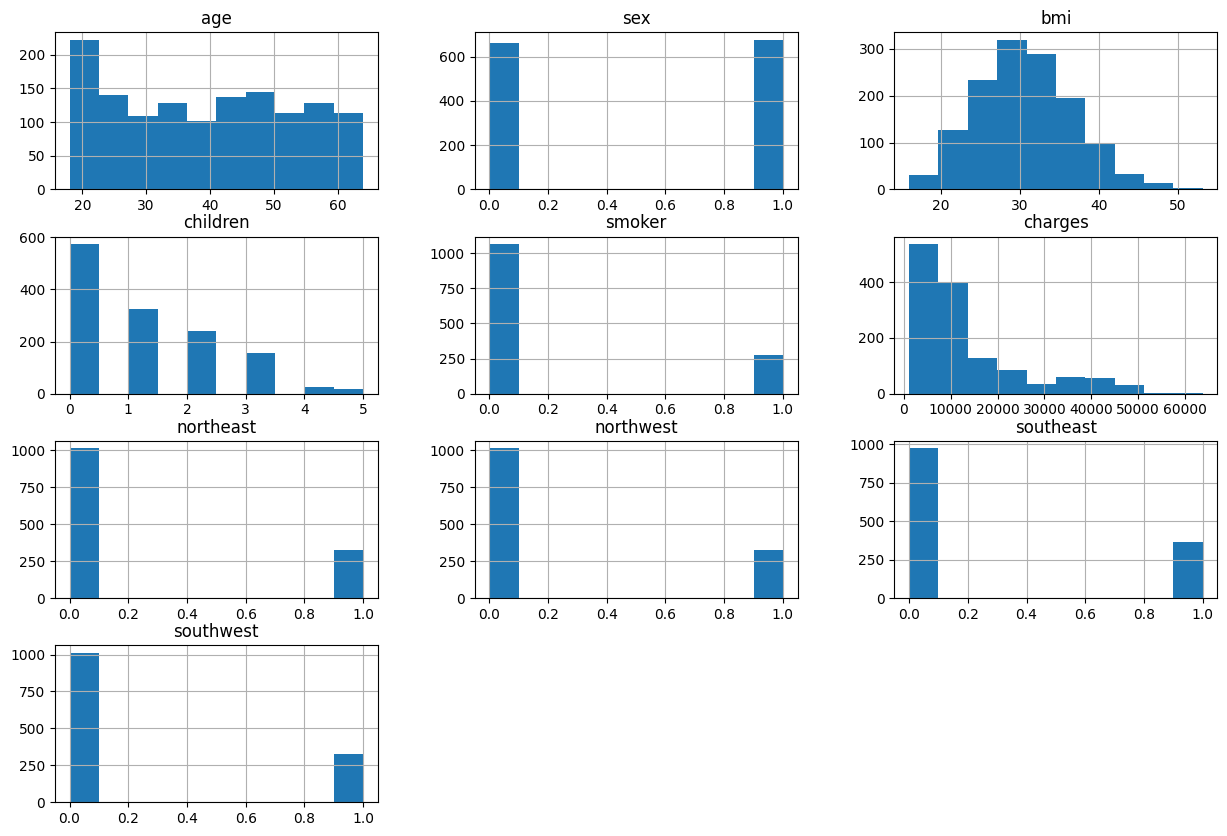

In [11]:
df.hist(figsize=(15,10))
plt.show()

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northeast  1338 non-null   int64  
 7   northwest  1338 non-null   int64  
 8   southeast  1338 non-null   int64  
 9   southwest  1338 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 104.7 KB


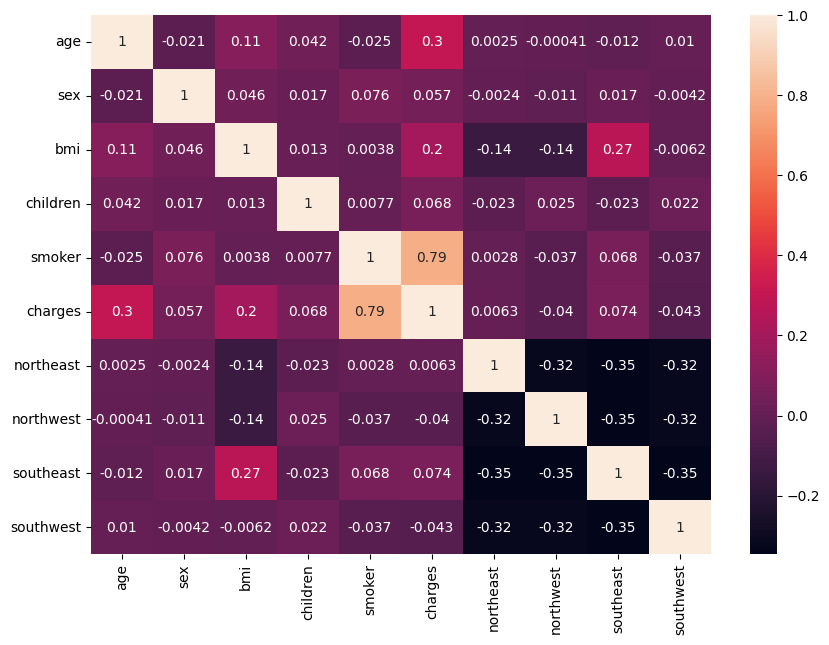

In [13]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error 


X = df.drop(columns=['charges'], axis=1)
y = df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
model = RandomForestRegressor(n_jobs = 1)
model.fit(X_train , y_train)

RandomForestRegressor(n_jobs=1)

In [16]:
model.score(X_test , y_test)

0.8654509812030918

In [17]:
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test , y_pred))
rmse

4570.400911482797

In [18]:
df['charges'].std()

12110.011236693994

In [19]:
y_test.std()

12483.196201893312

In [20]:
df['charges'].median()

9382.033

In [21]:
mae = mean_absolute_error(y_test, y_pred)

In [22]:
mae

2501.1150689421966

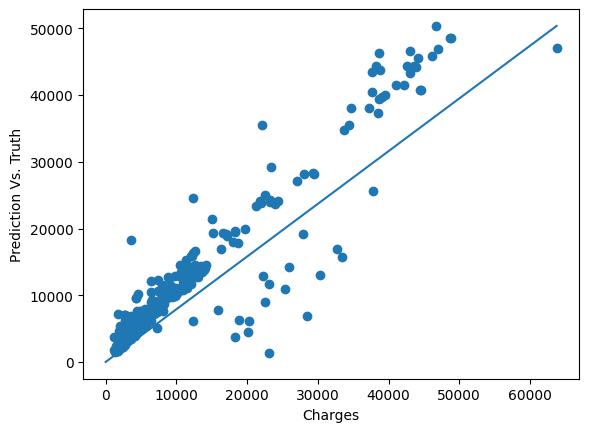

In [23]:
plt.scatter(y_test , y_pred)
plt.plot(np.linspace(0, max(y_test)), np.linspace(0, max(y_pred)))
plt.xlabel('Charges')
plt.ylabel('Prediction Vs. Truth')
plt.show()

In [24]:
feature_importance = sorted(zip(model.feature_names_in_ , model.feature_importances_), key = lambda x : x[1] , reverse = True) 

In [25]:
plt.figure(figsize=(10,6))
plt.bar([x[0] for x in feature_importance] , )

TypeError: bar() missing 1 required positional argument: 'height'

<Figure size 1000x600 with 0 Axes>